# Nesse notebook são demonstrados diversos comandos para as bibliotecas: Pandas, Matplotlib e Seaborn

## Importações e definindo um data frame

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Funções de Importação do Excel/Python ###
#   pd.read_csv (or) pd.read_excel

In [ ]:
preco = pd.DataFrame({'Produto': ['Lápis', 'Caneta', 'Borracha', 'Grampeador', 'Apontador'],
                      'Preço': [2.1, 7.3, 5.4, 10.9, 6],
                      'Qtde': [10, 15, 3, 2, 20],
                      'Custo': [0.5, 1.3, 0.7, 2, 2]})
preco

## Formas de Visualização

In [ ]:
### Formas de Visualização ###
preco['Produto']

In [ ]:
preco.Produto

In [ ]:
preco['Preço']

In [ ]:
preco.columns

## Ordenação

In [ ]:
preco = preco.sort_values(by='Produto', ascending=True)
preco

In [ ]:
##pegar apenas os preços maiores q 3.2
preco[preco['Preço'] > 3.2]

In [ ]:
preco[preco['Custo'] > 1.2]

In [ ]:
## Ordena os indeces das linhas
preco.sort_index()

In [ ]:
# Retorna true ou false
preco.Custo > 1.2

In [ ]:
# testes lógigos. ex: Custos maiores q 1.2 e quantidades maiores q 10. Ordenando os indices das linhas
preco[(preco['Custo'] > 1.2) & (preco.Qtde > 10)].sort_index()

In [ ]:
# Separar linhas head pega N linhas a partir do começo
preco.head(n=2)

In [ ]:
# e tail do final pega N linhas
preco.tail(n=3)

## Importar e exportar do Excel

In [ ]:
dados = pd.read_excel('teste.xlsx')
df = pd.DataFrame(dados)
df

In [ ]:
### separando em outro dataframe ( minerando)
df2 = df[(df['win rate'] > 35) & (df.payout == 78)]
df2

In [ ]:
df2.sort_values(by='win rate', ascending=False)

In [ ]:
df2.describe()#dados estatísticos

In [ ]:
df2.shape# linhas e colunas da tabela

In [ ]:
df2.rename(columns = {'win rate': 'win_rate'}, inplace=True)#renomeia  colunas
df2

In [ ]:
df2.rename(index = { 5 : 'teste'}, inplace=True)#renomeia  Linhas
df2

In [ ]:
df2.drop(index = ['teste'])#remove linha ou coluna

In [115]:
df2.to_excel('vazio.xlsx')# tava vazio, agr n tá mais kkkk

## Personalizando os índices(LINHAS)

In [ ]:
df = pd.DataFrame({'Produto': ['Lápis', 'Caneta', 'Borracha', 'Grampeador', 'Apontador'],
                      'Preço': [2.1, 7.3, 5.4, 10.9, 6],
                      'Qtde': [10, 15, 3, 2, 20],
                      'Custo': [0.5, 1.3, 0.7, 2, 2]})
df

In [ ]:
## Personalizando os índices(Linhas) ##
for i in range(1,6):
    df.rename(index={(i-1) : f'dia{i}'} ,inplace=True)
''' ## OU ##
df = pd.DataFrame({'Produto': ['Lápis', 'Caneta', 'Borracha', 'Grampeador', 'Apontador'],
                      'Preço': [2.1, 7.3, 5.4, 10.9, 6],
                      'Qtde': [10, 15, 3, 2, 20],
                      'Custo': [0.5, 1.3, 0.7, 2, 2]},
                      index=['dia1','dia2','dia3','dia4','dia5'])'''
df

## Localizando índices(Linhas)

In [ ]:
df.loc['dia2']

In [ ]:
df.loc['dia3'].Produto

In [ ]:
## encontrar o indice do produto
df.loc[(df.Produto == 'Borracha')]

In [ ]:
# valor do índice
a = df.loc[(df.Produto == 'Borracha')].index
a[0]

In [ ]:
df.loc[(df.Produto == 'Borracha')].Preço

In [ ]:
df.loc[(df.Preço >= 7)].Produto

## Excluindo Linha ou Coluna

In [ ]:
df.drop(['dia5'],axis=0) # drop linha

In [ ]:
df.drop(['Qtde'],axis=1) #drop coluna

## Agrupando com o Groupby

In [ ]:
df.groupby('Custo').mean()

In [186]:
df = pd.read_csv('bank.csv', encoding='UTF-8', sep=';')

In [ ]:
df.age.mean()

In [ ]:
df.age.max()

In [ ]:
df.age.min()


In [ ]:
df[df.marital == "married"].age.mean()

In [ ]:
df[['marital','age']].groupby(['marital']).mean()# agrupa os estados civis e faz as médias das idades 

In [ ]:
df[['marital','education','age']].groupby(['marital','education']).mean()# agrupa os estados civis e nível de educação, e faz as médias das idades 

In [ ]:
colunas = ['balance', 'marital']
df[(df.age >= 30) & (df.age <= 50) & (df.marital.isin(['married', 'divorced']))][colunas].groupby('marital').mean()
# pega os casados e divorciados entre 30 e 50 anos, agrupando esses estados civis para calcular a média do balanço deles

## ApplyLambda e União de Dados

In [ ]:
df = pd.read_excel('vazio.xlsx')
df1 = pd.read_excel('teste.xlsx')
df

In [ ]:
df2 = df1[df1.payout == 87]
df2.rename(columns= {'win rate' : 'win_rate'},inplace=True)
df2

In [ ]:
df3 = df1[df1.payout == 99]
df3.rename(columns= {'win rate' : 'win_rate'},inplace=True)
df3

In [204]:
for i in range(0,df2['win'].count()):
    df2.rename(index= {df2.index[i]:i}, inplace=True)
    df3.rename(index= {df3.index[i]:i}, inplace=True)

In [ ]:
df = df.drop(columns='Unnamed: 0')
df

In [ ]:
da = df['payout'].apply(lambda x: str(x)+'%')
da

In [ ]:
db = df['RSA %'].apply(lambda x: str(x)+'%')
db

### Testes Concat

In [ ]:
pd.concat([df,df2], ignore_index=True)

In [ ]:
pd.concat([df,df2.head(n=8)], axis=1)

### Testes Merge

In [ ]:
df2.head(n=8)

In [ ]:
mDf = pd.merge(df,df2.head(n=16), on=['N op','win','win_rate'])
# observe que o 'n' do head nesse caso tem q ser o dobro, pq o 'n' é divido por dois, ou seja, 8 pra o df e 8 para df2
mDf

In [ ]:
mDf = pd.merge(mDf,(df3.head(n=8)), on=['N op','win','win_rate'])
# colocando o 'n' igual a 8 ele pega os 4 primeiro do df e os 4 primeiros do df2
mDf

## Pandas com Matplolib

In [127]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
plt.scatter(x,y)
plt.show()

In [129]:
df = pd.DataFrame({'a':[10.1,10.2,10.1,9.8,9.7,9.9,10.2,10.5,10.1,10.3]})

In [ ]:
df.plot.line(color='k', linewidth= 5, style='--')
plt.show()

In [ ]:
df.plot.hist(bins=5, color='y')
plt.show()

In [ ]:
x = df.a.value_counts()
x.plot.bar(color='g')
plt.show()

In [ ]:
x.plot.pie()
plt.show()

In [ ]:
x.plot.pie(autopct='%1.2f')
plt.show()

In [ ]:
ex=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
x.plot.pie(autopct='%1.2f', explode=ex, shadow=True)
plt.show()

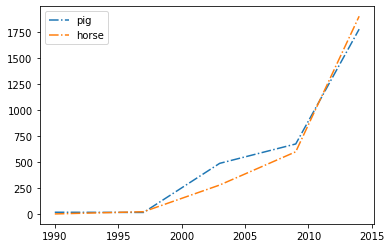

In [152]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
df.plot.line(style='-.')
plt.show()

In [ ]:
s = pd.Series([1, 3, 2])
s.plot.line()
plt.show()

numpy.ndarray

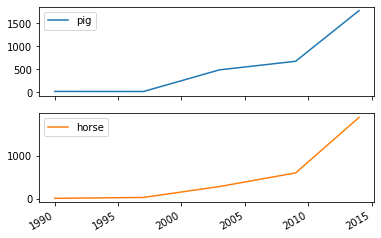

In [151]:
axes = df.plot.line(subplots=True)
type(axes)

## Matplotlib

In [154]:
x = np.random.normal(10,4,1000)

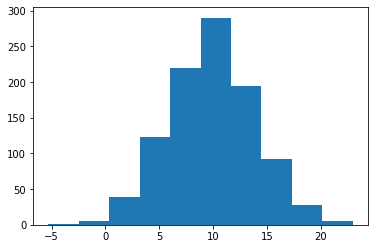

In [155]:
plt.hist(x)
plt.show()

In [156]:
a = [1,2,3]
b = [2000.00,5000.00,10000.00]
faixa = ['18-30', '30-60', '60-80']

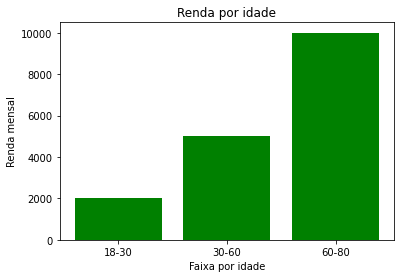

In [158]:
plt.xticks(a,faixa)
plt.title('Renda por idade')
plt.xlabel('Faixa por idade')
plt.ylabel('Renda mensal')
plt.bar(a,b,align='center', color='g')
plt.show()

### Gráfico de linha

In [ ]:
x = [10, 15, 20, 30, 40, 50, 60]
y = [15, 40, 75, 90, 100, 105, 115]

plt.plot(x,y, linestyle='--', color='b', marker='s', linewidth=1.0)
plt.axis([0,70,0,120])# mudar escala
plt.show()

### Gráfico de dispersão

In [160]:
x = [10, 15, 20, 30, 40, 50, 60]
y = [15, 25, 40, 55, 19, 45, 55]

x1 = [10, 15, 20, 30, 40, 50, 60]
y1 = [15, 40, 75, 90, 100, 105, 115]


In [ ]:
plt.scatter(x, y)
plt.plot(x1,y1,linestyle='--', color='black')
plt.axis([5,75,10,120])# mudar escala
plt.show()

### Outros gráficos

In [169]:
np.random.seed(100)
cols = ['Janeiro', 'Março','Maio', 'Julho','Agosto','Outubro','Novembro']
lin = np.arange(1,32)
dados = np.random.randint(492,2050,size=(31,7))
df = pd.DataFrame(data=dados, index=lin, columns=cols)

In [170]:
x = df.index
y = df['Janeiro']
y1 = df['Outubro']

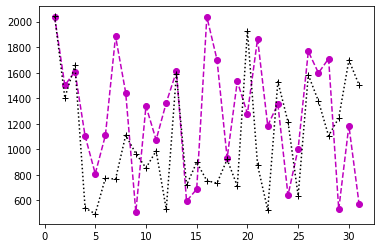

In [171]:
plt.plot(x,y,color='m', linestyle='--', marker='o')
plt.plot(x,y1,'k:+')
plt.show()

In [176]:
x = df.index
y = df[['Janeiro','Outubro']]

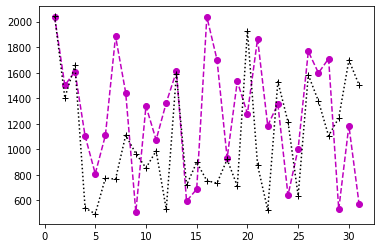

In [177]:
plt.plot(x,y.Janeiro,color='m', linestyle='--', marker='o')
plt.plot(x,y.Outubro,'k:+')
plt.show()

## Seaborn

In [228]:
df = sns.load_dataset('tips')

### Gráfico de dispersão e linhas

In [ ]:
sns.regplot(x='total_bill',y='tip',fit_reg=False,data=df)#parametro fit_reg=False retira a linha de regressão
plt.show()# sem esse plt.show ele mostra o tipo do gráfico, q vem da biblioteca do matplotlib.

In [ ]:
sns.set_palette('pastel')
sns.regplot(x='total_bill', y='tip', data=df)

### Gráfico de dispersão

In [ ]:
sns.scatterplot(x='total_bill',y='tip', hue='smoker', data=df)

In [ ]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',style='smoker',data=df)

In [ ]:
sns.scatterplot(x='total_bill',y='tip', hue='size', data=df)

In [ ]:
sns.scatterplot(x='total_bill',y='tip', size='size', data=df)

In [ ]:
sns.scatterplot(x='total_bill',y='tip', size='size',sizes=(15,300), data=df)

In [ ]:
f, ax = plt.subplots(figsize=(12,5))
sns.scatterplot(x='total_bill',y='tip', hue='day', style='time',data=df)

In [ ]:
sns.scatterplot(x='total_bill',y='tip', hue='day', style='time',data=df)

In [ ]:
#paleta para dados quantitativos
sns.scatterplot(x='total_bill',y='tip', hue='size',sizes=(12,250),size='size', palette='Blues', data=df)

In [ ]:
with sns.color_palette('Accent'):#executa a configuração da paleta apenas em quem está dentro da função with
    sns.scatterplot(x='total_bill',y='tip',data=df, size='size', sizes=(12,250))

### Gráficos de Barras

In [ ]:
#paleta para dados qualitativos
# Kind= count gráfico de barra normal
sns.catplot(x='sex',kind='count', palette='Set2', data=df)

In [ ]:
sns.catplot(y='day',kind='count', palette='Set1', data=df)

In [ ]:
sns.catplot(x='day',y='total_bill', palette='Set2', data=df)

In [ ]:
sns.catplot(x='day',y='total_bill', kind='swarm', data=df)

In [ ]:
sns.catplot(x='day', y='total_bill', kind='swarm', hue='sex', palette='Dark2', data=df)

### Heatmap

In [ ]:
#paleta para dados divergentes(correlação)
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

### Gráficos com Regressão

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='sex', palette='Pastel1', data=df)

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', palette='Set2', data=df)
# o parametro col separa em gráficos de acordo com o número de variáveis dentro da coluna time

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', palette='Set1',line_kws={'lw': 4}, scatter_kws={'s':90,'alpha':0.5}, data=df)

### Visualizando Outliers (Boxplot)

In [ ]:
sns.catplot(x='day', y='total_bill', kind='box', data=df)

In [ ]:
sns.catplot(x='day', y='total_bill', kind='box', hue='smoker',data=df)


In [ ]:
sns.catplot(x='day', y='total_bill', kind='boxen', data=df)

In [ ]:
#combinando gráficos
sns.stripplot(x='day', y='total_bill', color='blue', data=df)

In [ ]:
sns.catplot(x='sex', y='total_bill', hue='smoker', col='time', height=4, kind='boxen', data=df)

### Gráficos de Correlação

In [ ]:
correlacoes = df.corr()
correlacoes

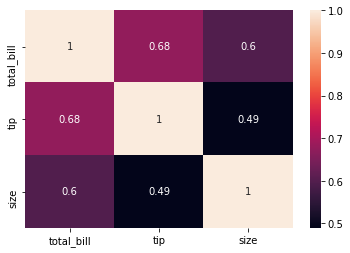

In [265]:
ax = sns.heatmap(correlacoes, annot=True)#correlações na última sessão